<a href="https://colab.research.google.com/github/ClaudeLewisMbua/claudelewismbua.github.io/blob/master/Copy_of_Market_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Packages**

We Laod the helpful packages we need for our work





In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# **About the data**
***S&P 500 Companies with Financial Information***:
A Dataset with Key Stock Market Information

***Context***

This is a comprehensive dataset including numerous financial metrics that many professionals and investing gurus often use to value companies. This data is a look at the *companies that comprise the S&P 500 (Standard & Poor's 500)*. The S&P 500 is a **capitalization-weighted index** of the top 500 publicly traded companies in the United States (top 500 meaning the companies with the largest market cap). The S&P 500 index is a useful index to study because *it generally reflects the health of the overall U.S. stock market*. The dataset was last updated in July 2020.

***Content***

 - 4 character variables:
        - Symbol: Ticker symbol used to uniquely identify each company on a particular stock market
        - Name: Legal name of the company
        - Sector: An area of the economy where businesses share a related product or service
        - SEC Filings: Helpful documents relating to a company

    - 10 numeric variables:
        - Price: Price per share of the company
        - Price to Earnings (PE): The ratio of a company’s share price to its earnings per share
        - Dividend Yield: The ratio of the annual dividends per share divided by the price per share
        - Earnings Per Share (EPS): A company’s profit divided by the number of shares of its stock
        - 52 week high and low: The annual high and low of a company’s share price
        - Market Cap: The market value of a company’s shares (calculated as share price x number of shares)
        - EBITDA: A company’s earnings before interest, taxes, depreciation, and amortization; often used as a proxy for its profitability
        - Price to Sales (PS): A company’s market cap divided by its total sales or revenue over the past year
        - Price to Book (PB): A company’s price per share divided by its book value

# **Inspiration**

What useful information can you gleam from this dataset? Are these fundamentals enough to predict a high-quality company? How can you determine high from low quality? What would you liked to have seen in this dataset?

In [ ]:
#source of data: https://datahub.io/core/s-and-p-500-companies-financials/r/1.html
S_P_500_FD=pd.read_csv('/financials.csv')
S_P_500_FD.head()

,Symbol,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings
0,MMM,3M Company,Industrials,222.89,24.31,2.332862,7.92,259.77,175.490,1.387211e+11,9.048000e+09,4.390271,11.34,http://www.sec.gov/cgi-bin/browse-edgar?action...
1,AOS,A.O. Smith Corp,Industrials,60.24,27.76,1.147959,1.70,68.39,48.925,1.078342e+10,6.010000e+08,3.575483,6.35,http://www.sec.gov/cgi-bin/browse-edgar?action...
2,ABT,Abbott Laboratories,Health Care,56.27,22.51,1.908982,0.26,64.60,42.280,1.021210e+11,5.744000e+09,3.740480,3.19,http://www.sec.gov/cgi-bin/browse-edgar?action...
3,ABBV,AbbVie Inc.,Health Care,108.48,19.41,2.499560,3.29,125.86,60.050,1.813863e+11,1.031000e+10,6.291571,26.14,http://www.sec.gov/cgi-bin/browse-edgar?action...
4,ACN,Accenture plc,Information Technology,150.51,25.47,1.714470,5.44,162.60,114.820,9.876586e+10,5.643228e+09,2.604117,10.62,http://www.sec.gov/cgi-bin/browse-edgar?action...


In [ ]:
len(S_P_500_FD) #We check the size of the dataset

505

In [ ]:
S_P_500_FD.info() # We check the information of all the columns of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Symbol          505 non-null    object 
 1   Name            505 non-null    object 
 2   Sector          505 non-null    object 
 3   Price           505 non-null    float64
 4   Price/Earnings  503 non-null    float64
 5   Dividend Yield  505 non-null    float64
 6   Earnings/Share  505 non-null    float64
 7   52 Week Low     505 non-null    float64
 8   52 Week High    505 non-null    float64
 9   Market Cap      505 non-null    float64
 10  EBITDA          505 non-null    float64
 11  Price/Sales     505 non-null    float64
 12  Price/Book      497 non-null    float64
 13  SEC Filings     505 non-null    object 
dtypes: float64(10), object(4)
memory usage: 55.4+ KB


In [ ]:
S_P_500_FD.describe() #We check for some basic statistical summary of the datset (for the numerical variables)

,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book
count,505.000000,503.000000,505.000000,505.000000,505.000000,505.000000,5.050000e+02,5.050000e+02,505.000000,497.000000
mean,103.830634,24.808390,1.895953,3.753743,122.623832,83.536616,4.923944e+10,3.590328e+09,3.941705,14.453179
std,134.427636,41.241081,1.537214,5.689036,155.362140,105.725473,9.005017e+10,6.840544e+09,3.460110,89.660508
min,2.820000,-251.530000,0.000000,-28.010000,6.590000,2.800000,2.626102e+09,-5.067000e+09,0.153186,0.510000
25%,46.250000,15.350000,0.794834,1.490000,56.250000,38.430000,1.273207e+10,7.739320e+08,1.629490,2.020000
50%,73.920000,19.450000,1.769255,2.890000,86.680000,62.850000,2.140095e+10,1.614399e+09,2.896440,3.400000
75%,116.540000,25.750000,2.781114,5.140000,140.130000,96.660000,4.511968e+10,3.692749e+09,4.703842,6.110000
max,1806.060000,520.150000,12.661196,44.090000,2067.990000,1589.000000,8.095080e+11,7.938600e+10,20.094294,1403.380000


In [ ]:
S_P_500_FD.corr() #We check for the correlation amongst those numerical variables

,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book
Price,1.000000,0.194761,-0.244630,0.591061,0.995076,0.982787,0.406474,0.180321,0.181625,0.023637
Price/Earnings,0.194761,1.000000,-0.181330,0.004570,0.185356,0.144700,0.131381,0.002950,0.188558,0.000366
Dividend Yield,-0.244630,-0.181330,1.000000,-0.077235,-0.244426,-0.207953,-0.021794,0.126133,-0.077724,0.089369
Earnings/Share,0.591061,0.004570,-0.077235,1.000000,0.588595,0.604894,0.194063,0.180583,-0.036178,0.032254
52 Week Low,0.995076,0.185356,-0.244426,0.588595,1.000000,0.984853,0.398504,0.176277,0.188823,0.023322
52 Week High,0.982787,0.144700,-0.207953,0.604894,0.984853,1.000000,0.375588,0.179666,0.173721,0.017794
Market Cap,0.406474,0.131381,-0.021794,0.194063,0.398504,0.375588,1.000000,0.771344,0.095249,0.034411
EBITDA,0.180321,0.002950,0.126133,0.180583,0.176277,0.179666,0.771344,1.000000,-0.037175,0.035547
Price/Sales,0.181625,0.188558,-0.077724,-0.036178,0.188823,0.173721,0.095249,-0.037175,1.000000,0.012337
Price/Book,0.023637,0.000366,0.089369,0.032254,0.023322,0.017794,0.034411,0.035547,0.012337,1.000000


In [ ]:
new=S_P_500_FD.groupby('Sector') #We group our dataset by sector

In [ ]:
new.first()

,Symbol,Name,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings
Sector,,,,,,,,,,,,,
Consumer Discretionary,AAP,Advance Auto Parts,109.63,19.54,0.218321,6.19,169.550,78.8100,8.123612e+09,8.539410e+08,1.130106,2.51,http://www.sec.gov/cgi-bin/browse-edgar?action...
Consumer Staples,MO,Altria Group Inc,64.05,18.89,3.952688,5.31,77.790,60.0100,1.269851e+11,1.077300e+10,4.945682,10.32,http://www.sec.gov/cgi-bin/browse-edgar?action...
Energy,APC,Anadarko Petroleum Corp,56.20,-21.29,1.702997,-5.90,70.000,39.9600,3.212909e+10,3.115000e+09,3.968221,2.88,http://www.sec.gov/cgi-bin/browse-edgar?action...
Financials,AMG,Affiliated Managers Group Inc,179.11,12.24,0.638740,12.07,216.995,148.8100,1.044217e+10,1.261400e+09,4.591235,2.89,http://www.sec.gov/cgi-bin/browse-edgar?action...
Health Care,ABT,Abbott Laboratories,56.27,22.51,1.908982,0.26,64.600,42.2800,1.021210e+11,5.744000e+09,3.740480,3.19,http://www.sec.gov/cgi-bin/browse-edgar?action...
Industrials,MMM,3M Company,222.89,24.31,2.332862,7.92,259.770,175.4900,1.387211e+11,9.048000e+09,4.390271,11.34,http://www.sec.gov/cgi-bin/browse-edgar?action...
Information Technology,ACN,Accenture plc,150.51,25.47,1.714470,5.44,162.600,114.8200,9.876586e+10,5.643228e+09,2.604117,10.62,http://www.sec.gov/cgi-bin/browse-edgar?action...
Materials,APD,Air Products & Chemicals Inc,152.80,24.22,2.781114,13.66,175.170,133.6301,3.463839e+10,2.542500e+09,4.116368,3.35,http://www.sec.gov/cgi-bin/browse-edgar?action...
Real Estate,ARE,Alexandria Real Estate Equities Inc,114.58,19.03,3.026227,1.57,134.370,106.8900,1.204337e+10,0.000000e+00,10.492155,2.07,http://www.sec.gov/cgi-bin/browse-edgar?action...


In [ ]:
S_P_500_FD.max() # check the max value for each variable in our dataset

Symbol                                                          ZTS
Name                                                      eBay Inc.
Sector                                                    Utilities
Price                                                       1806.06
Price/Earnings                                               520.15
Dividend Yield                                            12.661196
Earnings/Share                                                44.09
52 Week Low                                                 2067.99
52 Week High                                                 1589.0
Market Cap                                           809508034020.0
EBITDA                                                79386000000.0
Price/Sales                                               20.094294
Price/Book                                                  1403.38
SEC Filings       http://www.sec.gov/cgi-bin/browse-edgar?action...
dtype: object

In [ ]:
S_P_500_FD.min() # check the min value for each variable in our dataset

Symbol                                                            A
Name                                                     3M Company
Sector                                       Consumer Discretionary
Price                                                          2.82
Price/Earnings                                              -251.53
Dividend Yield                                                  0.0
Earnings/Share                                               -28.01
52 Week Low                                                    6.59
52 Week High                                                    2.8
Market Cap                                             2626102121.0
EBITDA                                                -5067000000.0
Price/Sales                                                0.153186
Price/Book                                                     0.51
SEC Filings       http://www.sec.gov/cgi-bin/browse-edgar?action...
dtype: object

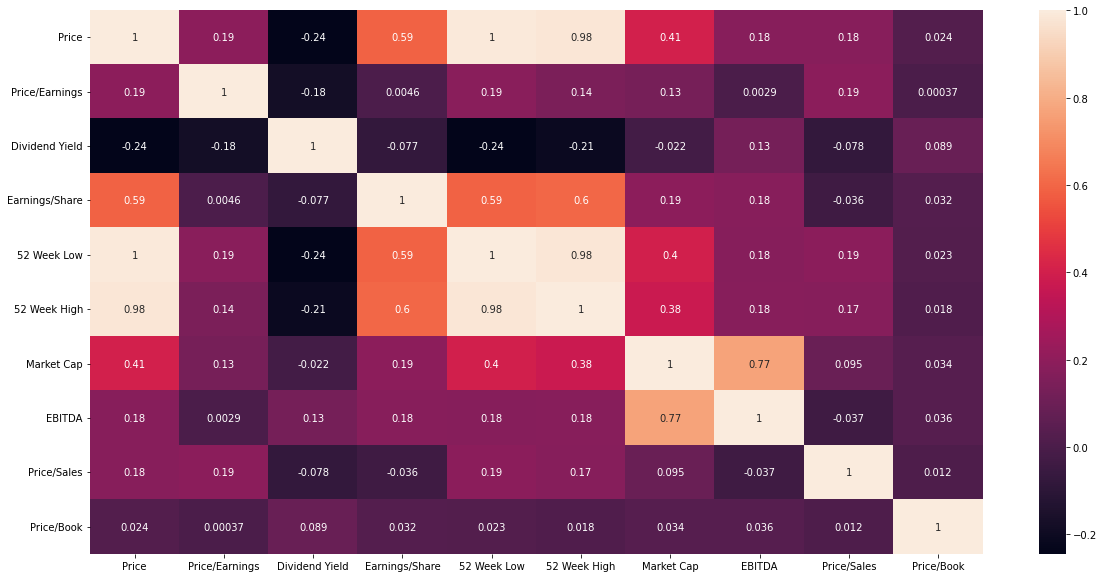

In [ ]:
fig=plt.figure(figsize=(20,10))
sns.heatmap(S_P_500_FD.corr(),data=S_P_500_FD,annot=True) #We observe the correlation of the numerical variables on a heat map

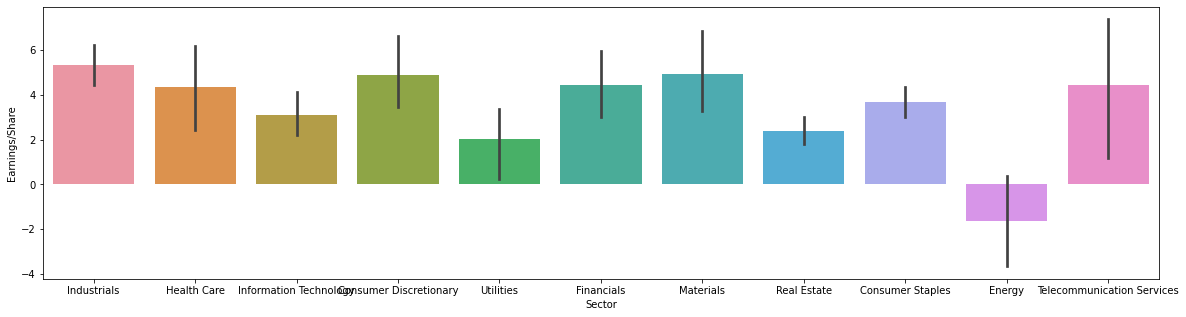

In [ ]:
fig=plt.figure(figsize=(20,5))
sns.barplot(x='Sector',y='Earnings/Share',data=S_P_500_FD) #We visualise the earnings/shares of each sector in our dataset with help of bar plots

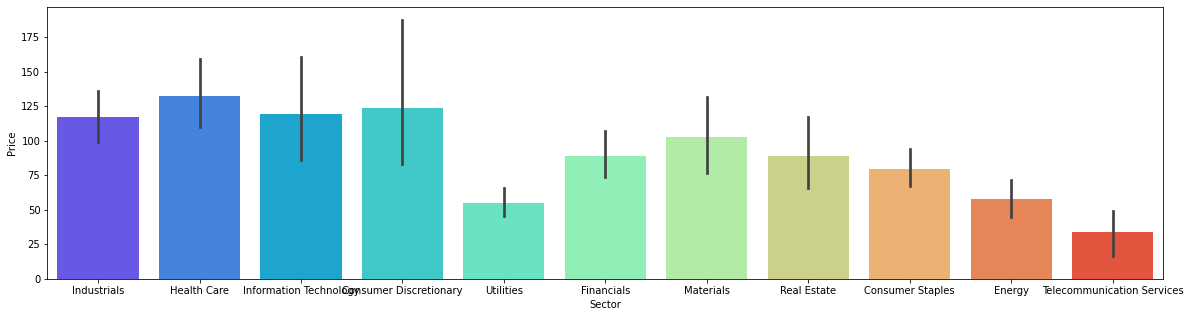

In [ ]:
fig=plt.figure(figsize=(20,5))
sns.barplot(x='Sector',y='Price',data=S_P_500_FD,palette='rainbow') #We visualise the Prices of each sector in our dataset with help of bar plots

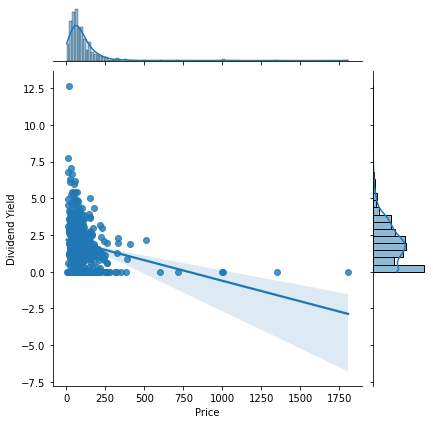

In [ ]:
sns.jointplot(x='Price',y='Dividend Yield',data=S_P_500_FD,kind='reg') #With the help of a joint plot, we visualise the Dividend yield for each price

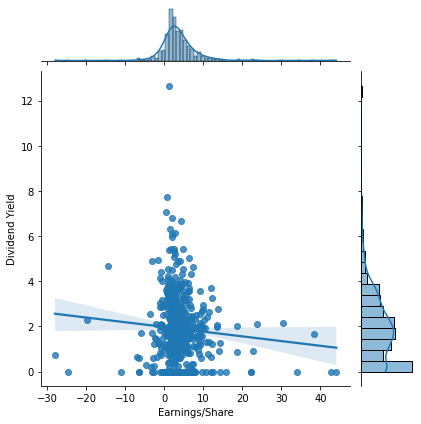

In [ ]:
sns.jointplot(x='Earnings/Share',y='Dividend Yield',data=S_P_500_FD,kind='reg')

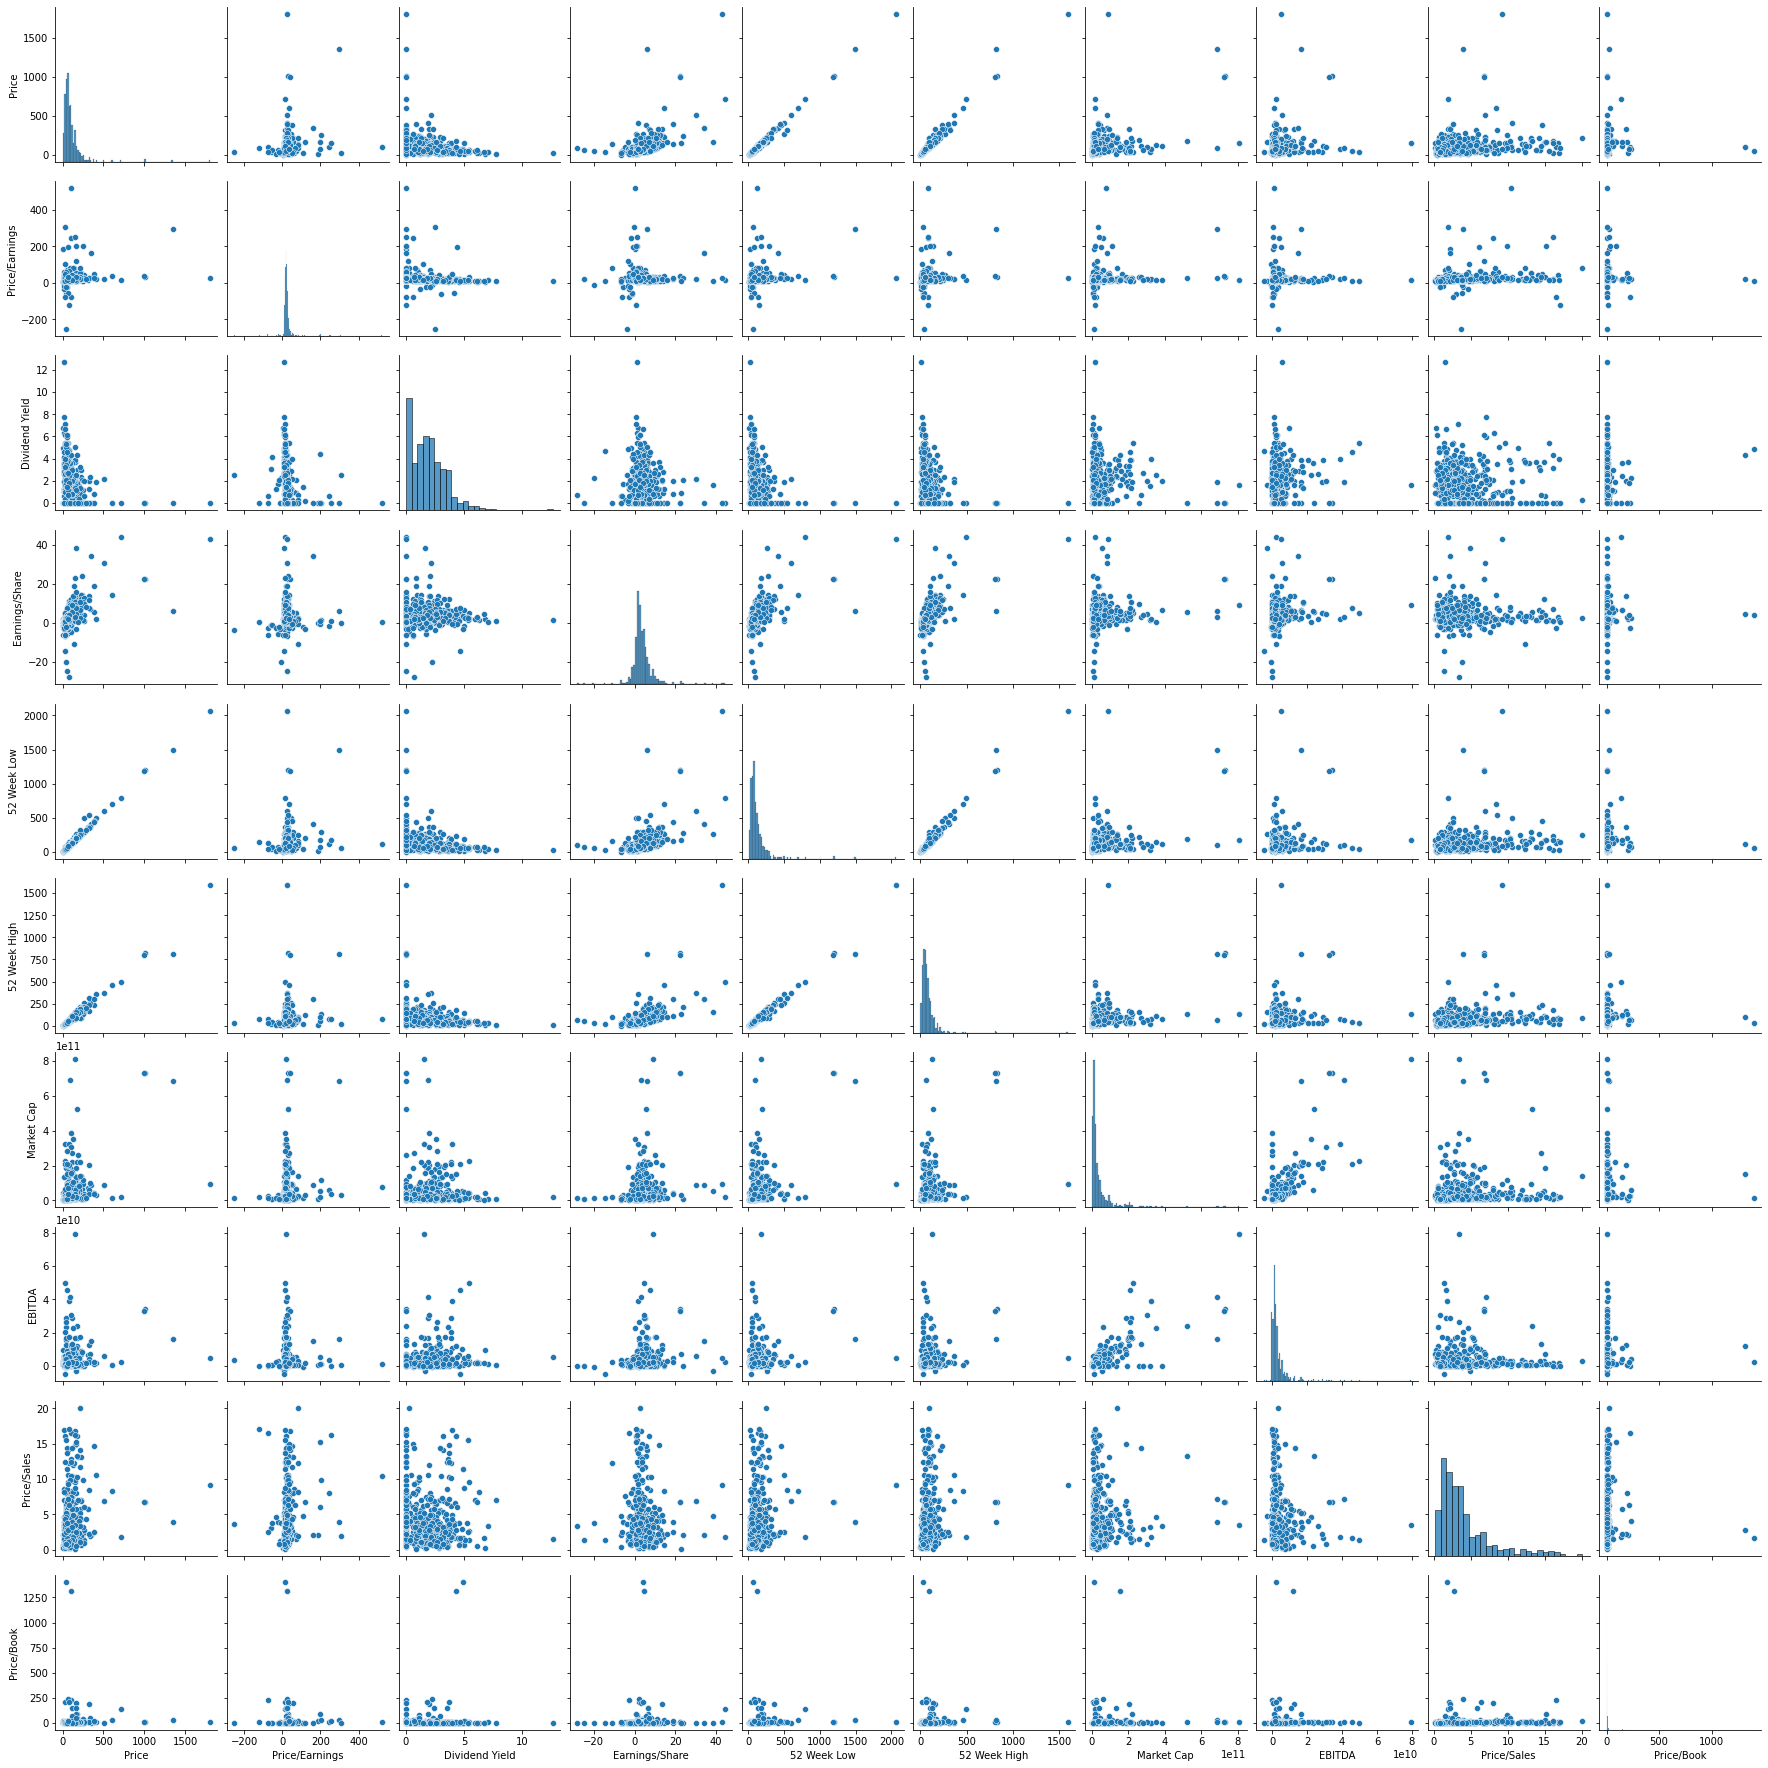

In [ ]:
sns.pairplot(S_P_500_FD) #We visualise all the numerical variables of our dataset 2 by 2 with the halp of a pair plot

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text major ticklabel objects>)

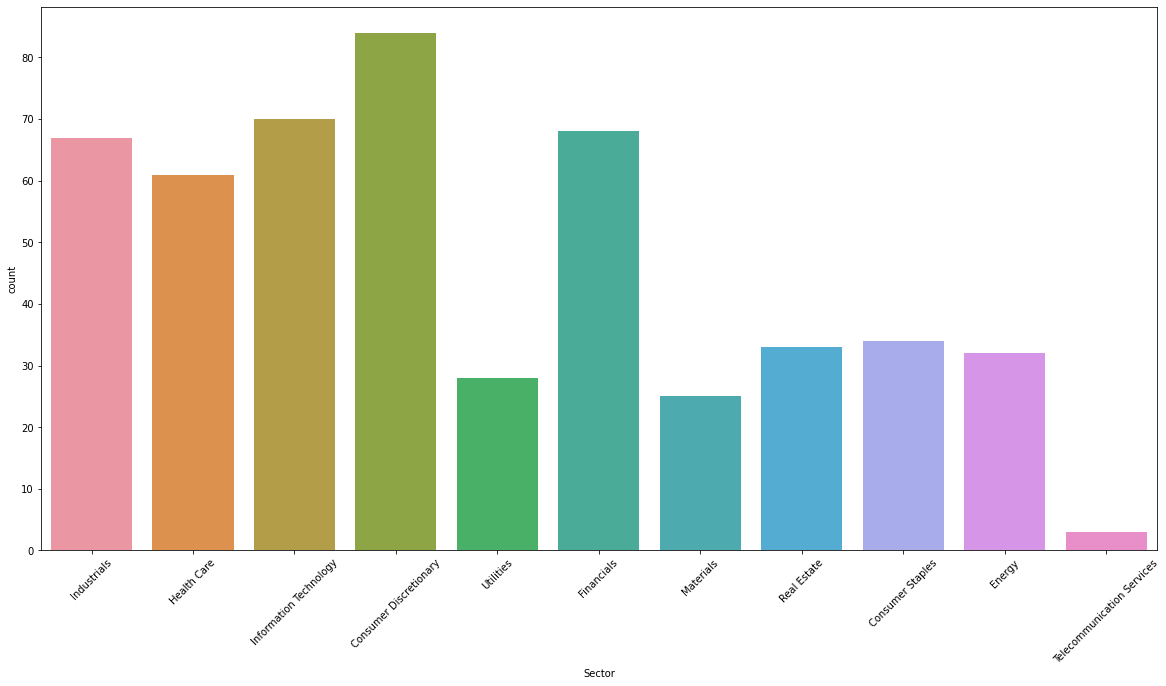

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(x='Sector',data=S_P_500_FD)
# labels, title and ticks
plt.xticks(rotation=45)
#locs, labels = plt.xticks(rotation=45)
#plt.setp(labels, rotation=45)

In [ ]:
S_P_500_FD['Price/Share']=S_P_500_FD['Price/Earnings']*S_P_500_FD['Earnings/Share']

In [ ]:
S_P_500_FD.head()

,Symbol,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings,Price/Share
0,MMM,3M Company,Industrials,222.89,24.31,2.332862,7.92,259.77,175.490,1.387211e+11,9.048000e+09,4.390271,11.34,http://www.sec.gov/cgi-bin/browse-edgar?action...,192.5352
1,AOS,A.O. Smith Corp,Industrials,60.24,27.76,1.147959,1.70,68.39,48.925,1.078342e+10,6.010000e+08,3.575483,6.35,http://www.sec.gov/cgi-bin/browse-edgar?action...,47.1920
2,ABT,Abbott Laboratories,Health Care,56.27,22.51,1.908982,0.26,64.60,42.280,1.021210e+11,5.744000e+09,3.740480,3.19,http://www.sec.gov/cgi-bin/browse-edgar?action...,5.8526
3,ABBV,AbbVie Inc.,Health Care,108.48,19.41,2.499560,3.29,125.86,60.050,1.813863e+11,1.031000e+10,6.291571,26.14,http://www.sec.gov/cgi-bin/browse-edgar?action...,63.8589
4,ACN,Accenture plc,Information Technology,150.51,25.47,1.714470,5.44,162.60,114.820,9.876586e+10,5.643228e+09,2.604117,10.62,http://www.sec.gov/cgi-bin/browse-edgar?action...,138.5568


In [ ]:
import cufflinks as cf 

In [ ]:
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()

In [ ]:
#We drop the following variables and creat a new dataset called newdata
newdata=S_P_500_FD.drop(['Symbol','SEC Filings','52 Week High','52 Week Low','Name','Sector','Price/Share','Market Cap','EBITDA'],axis=1)


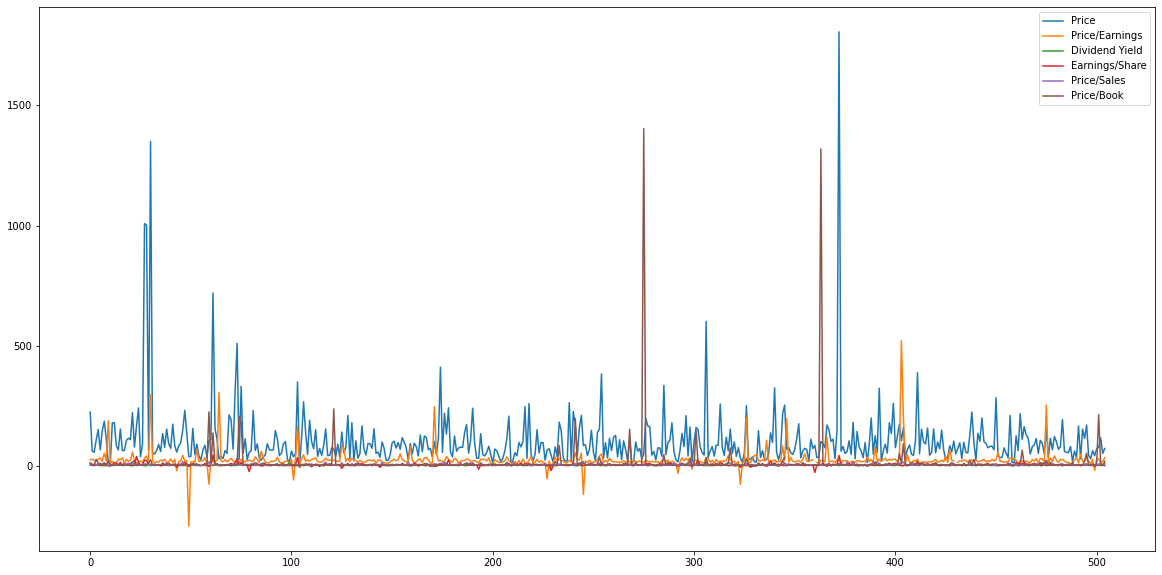

In [ ]:
newdata.plot(figsize=(20,10))

In [ ]:
#we creat a new column called Number of Shares Outstanding in which we store the calculated  outstanding number of shares
S_P_500_FD['Number of Shares Outstanding']=S_P_500_FD['Market Cap']/S_P_500_FD['Price']

In [ ]:
S_P_500_FD.head()

,Symbol,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings,Price/Share,Number of Shares Outstanding
0,MMM,3M Company,Industrials,222.89,24.31,2.332862,7.92,259.77,175.490,1.387211e+11,9.048000e+09,4.390271,11.34,http://www.sec.gov/cgi-bin/browse-edgar?action...,192.5352,6.223745e+08
1,AOS,A.O. Smith Corp,Industrials,60.24,27.76,1.147959,1.70,68.39,48.925,1.078342e+10,6.010000e+08,3.575483,6.35,http://www.sec.gov/cgi-bin/browse-edgar?action...,47.1920,1.790076e+08
2,ABT,Abbott Laboratories,Health Care,56.27,22.51,1.908982,0.26,64.60,42.280,1.021210e+11,5.744000e+09,3.740480,3.19,http://www.sec.gov/cgi-bin/browse-edgar?action...,5.8526,1.814840e+09
3,ABBV,AbbVie Inc.,Health Care,108.48,19.41,2.499560,3.29,125.86,60.050,1.813863e+11,1.031000e+10,6.291571,26.14,http://www.sec.gov/cgi-bin/browse-edgar?action...,63.8589,1.672072e+09
4,ACN,Accenture plc,Information Technology,150.51,25.47,1.714470,5.44,162.60,114.820,9.876586e+10,5.643228e+09,2.604117,10.62,http://www.sec.gov/cgi-bin/browse-edgar?action...,138.5568,6.562079e+08


In [ ]:
# we check for the correlation between Number of Shares Outstanding and prices 
S_P_500_FD[['Number of Shares Outstanding','Price']].corr()

,Number of Shares Outstanding,Price
Number of Shares Outstanding,1.0000,-0.1167
Price,-0.1167,1.0000


# **Machine Learning part**

We start by building our dataset with X containing the variables to consider and y the labels

In [ ]:
# to X we assign the variables 'Earnings/Share','EBITDA','Dividend Yield','Number of Shares Outstanding','52 Week High','52 Week Low'
# to y we assign the variable price
X=S_P_500_FD[['Earnings/Share','EBITDA','Dividend Yield','Number of Shares Outstanding','52 Week High','52 Week Low']]
y=S_P_500_FD['Price']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# we split our dataset into train and test set, extracting 30% of our dataset to be kept for text and the rest for training
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

# **Linear Regression**

In [ ]:
# We shall use here a simple linear regression fonction and what we want to predict here is the price 
# Given that we now 'Earnings/Share','EBITDA','Dividend Yield','Number of Shares Outstanding','52 Week High','52 Week Low'
from sklearn.linear_model import LinearRegression

In [ ]:
lm=LinearRegression() # we load the linear regression function
lm.fit(X_train,y_train) # we train our model
print(lm.intercept_) # the mean value of the response variable when all of the predictor variables in the model are equal to zero
#can recall the intercept here https://www.statology.org/intercept-in-regression/#:~:text=The%20intercept%20(sometimes%20called%20the,model%20are%20equal%20to%20zero.

-2.240351673078365


In [ ]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient']) #https://scikit-learn.org/stable/modules/linear_model.html
coeff_df

,Coefficient
Earnings/Share,-2.416472e-02
EBITDA,2.673881e-11
Dividend Yield,-2.109340e-01
Number of Shares Outstanding,4.781055e-10
52 Week High,3.776939e-02
52 Week Low,8.406483e-01


In [ ]:
predictions=lm.predict(X_test) # we test our model on the 30% test set that was left out and predict the prices

Text(0, 0.5, 'predictions')

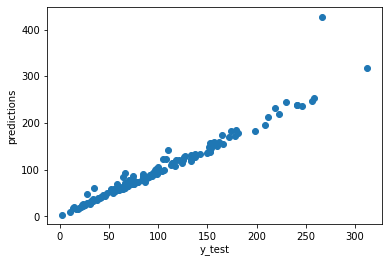

In [ ]:
plt.scatter(y_test,predictions) # we visualise our predictions compared with the real prices in y test that was left out
plt.xlabel("y_test")
plt.ylabel("predictions")

In [ ]:
from sklearn import metrics # we import the package that will give us various matrics to visualise our error

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 6.227356368763234
MSE: 227.03160650354206
RMSE: 15.067568035470822


# **Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
#https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html 
from sklearn.model_selection import cross_val_score

In [ ]:
#Create our regressor using decision tree
regressor = DecisionTreeRegressor(random_state=0)
#Train the model using the training sets
regressor.fit(X_train, y_train)
cross_val_score(regressor, X_train,y_train)#, cv=10)https://medium.com/analytics-vidhya/using-cross-validation-to-evaluate-different-models-regression-5f61ec89531

array([0.63324283, 0.93629629, 0.80968478, 0.83812351, 0.93217274])

In [ ]:
pred = regressor.predict(X_test)

In [ ]:
score = regressor.score(X_test, y_test)
score

0.9065929095177422

Text(0, 0.5, 'pred')

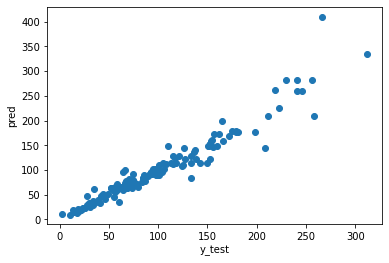

In [ ]:
plt.scatter(y_test,pred)
plt.xlabel("y_test")
plt.ylabel("pred")

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 9.960855263157896
MSE: 353.3237059210527
RMSE: 18.796906817906308


# **Lasso Regression**

In [ ]:
from sklearn.linear_model import LassoCV
lasso = LassoCV(cv=5).fit(X_train, y_train)
lasso.score(X_train, y_train)

0.12192083361778883

In [ ]:
lasso_pred = lasso.predict(X_test)

Text(0, 0.5, 'lasso_pred')

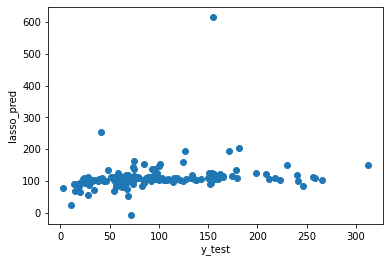

In [ ]:
plt.scatter(y_test,lasso_pred)
plt.xlabel("y_test")
plt.ylabel("lasso_pred")

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, lasso_pred))
print('MSE:', metrics.mean_squared_error(y_test, lasso_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lasso_pred)))

MAE: 51.68507262240903
MSE: 5063.462780703458
RMSE: 71.15801276527793


# **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
np.mean(cross_val_score(rf,X_train, y_train, cv=5))

0.902764233004311

In [ ]:
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

Text(0, 0.5, 'rf_pred')

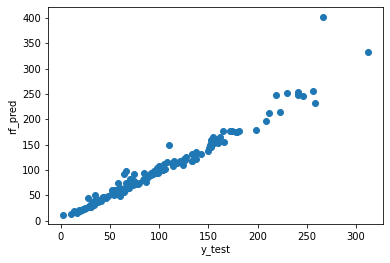

In [ ]:
plt.scatter(y_test,rf_pred)
plt.xlabel("y_test")
plt.ylabel("rf_pred")

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, rf_pred))
print('MSE:', metrics.mean_squared_error(y_test, rf_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rf_pred)))

MAE: 6.670125
MSE: 197.77667383223744
RMSE: 14.063309490736433
